In [1]:
import acquire
import model
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### Acquire and get wine database

In [2]:
df = acquire.get_wine()

### Split the database

In [3]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model.train_validate_test_dummy(df, 'quality')

### Scale the X sets

In [4]:
X_train_scaled, X_validate_scaled, X_test_scaled = model.scale_data(X_train, X_validate, X_test)

In [39]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_scaled[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    pd.Series({k: KMeans(k).fit(X_train_scaled[['residual sugar', 'alcohol', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    pd.Series({k: KMeans(k).fit(X_train_scaled[['volatile acidity', 'chlorides', 'density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
   
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Create three clustering models based on 2, 3 and four features

In [6]:
X_train_2_features = X_train_scaled[['density', 'alcohol']]
X_validate_2_features = X_validate_scaled[['density', 'alcohol']]


kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(X_train_2_features)

X_train['2_cluster'] = kmeans2.predict(X_train_2_features)
X_validate['2_cluster'] = kmeans2.predict(X_validate_2_features)

In [7]:
X_train_3_features = X_train_scaled[['residual sugar', 'total sulfur dioxide', 'alcohol']]
X_train_3_features
X_validate_3_features = X_validate_scaled[['residual sugar', 'total sulfur dioxide', 'alcohol']]
X_validate_3_features

kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(X_train_3_features)

X_train['3_cluster'] = kmeans3.predict(X_train_3_features)
X_validate['3_cluster'] = kmeans3.predict(X_validate_3_features)

In [8]:
X_train_4_features = X_train_scaled[['volatile acidity', 'chlorides', 'density', 'alcohol']]
X_train_4_features
X_validate_4_features = X_validate_scaled[['volatile acidity', 'chlorides', 'density', 'alcohol']]
X_validate_4_features

kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X_train_4_features)

X_train['4_cluster'] = kmeans4.predict(X_train_4_features)
X_validate['4_cluster'] = kmeans4.predict(X_validate_4_features)

### Take a look at the X_train with the cluster columns

In [9]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster,4_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,3,0,2
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,1,1,1
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,2,0,2
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,3,0,2
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,3,0,2
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,1,2,0
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,1,2,0
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,1,2,0


### Visualize Clusters on unscaled dataframe (even though clustered on scaled)

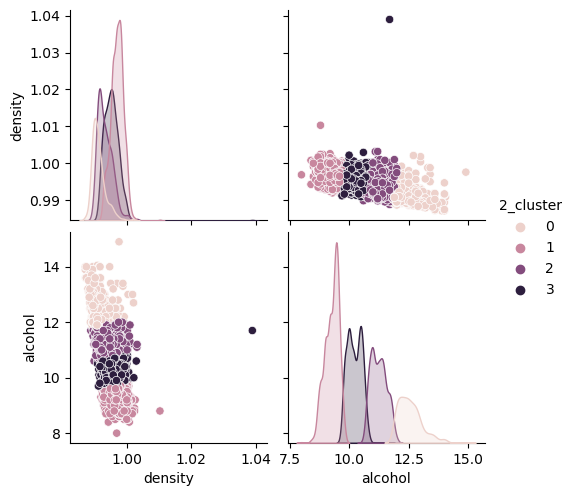

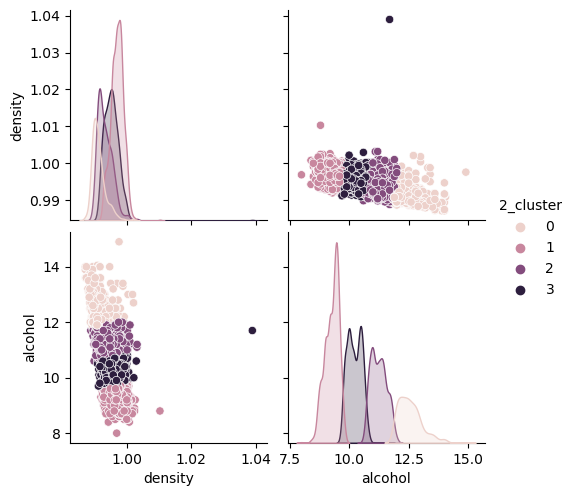

In [11]:
sns.pairplot(X_train, x_vars=['density', 'alcohol'], y_vars=['density', 'alcohol'], hue='2_cluster')
plt.show()

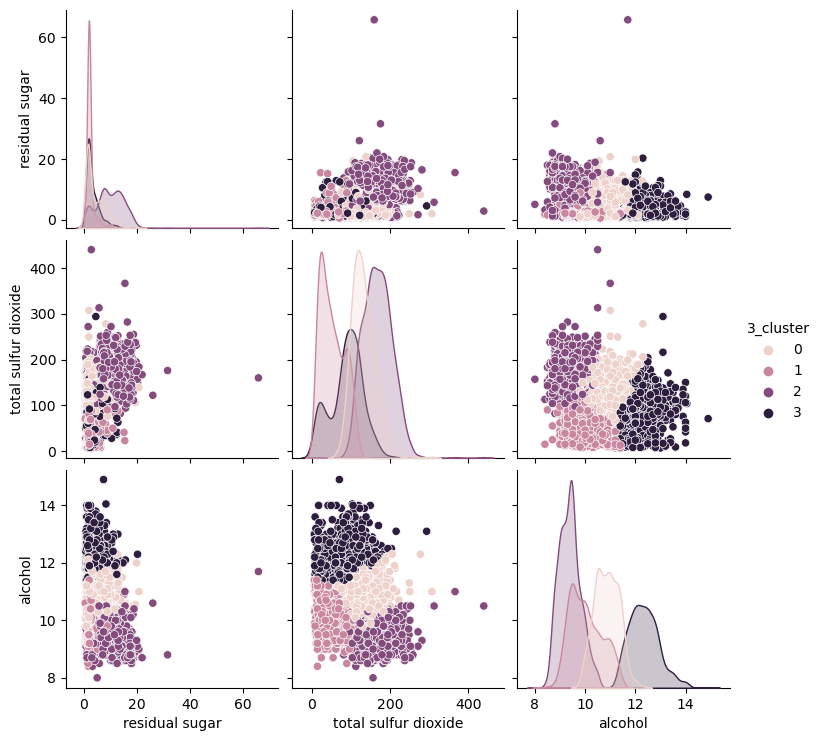

In [12]:
sns.pairplot(X_train,  x_vars=['residual sugar', 'total sulfur dioxide', 'alcohol'] , y_vars=['residual sugar', 'total sulfur dioxide', 'alcohol'], hue='3_cluster')
plt.show()

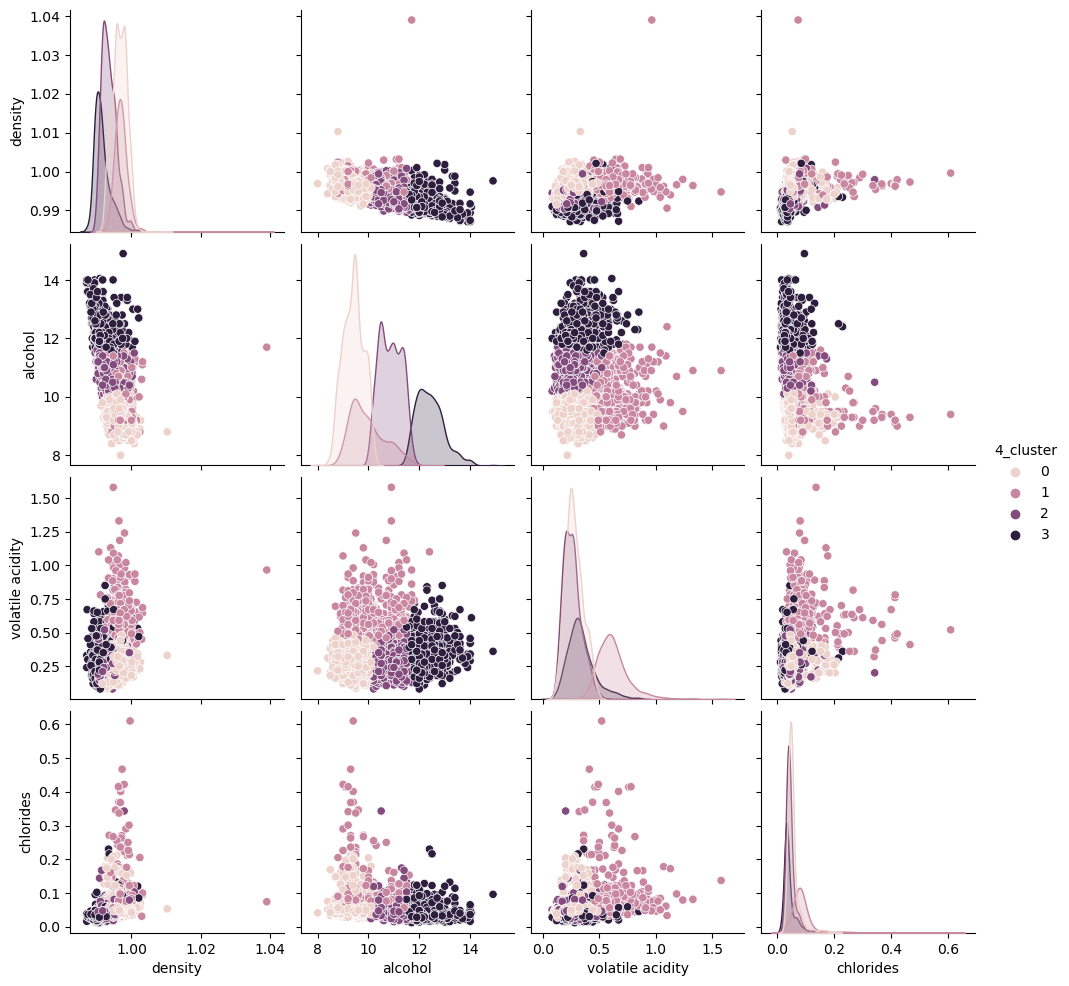

In [13]:
sns.pairplot(X_train, x_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], y_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], hue='4_cluster')
plt.show()

### Create seperate train dataframes for 2, 3 and 4 features respectively to use in linear regression 

In [16]:
X_train_2, X_train_3, X_train_4 = model.cluster_to_dummy(X_train)
X_train_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,1,2,3
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,0,0,1
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,1,0,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,0,1,0
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,0,0,1
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,0,0,1
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,1,0,0
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,1,0,0
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,1,0,0


In [17]:
X_validate_2, X_validate_3, X_validate_4 = model.cluster_to_dummy(X_validate)
X_validate_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,1,2,3
497,6.8,0.23,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,1,0,0,0
813,6.9,0.39,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,0,0,1,0
741,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,0,1,0,0
439,6.2,0.35,0.04,1.2,0.060,23.0,108.0,0.99340,3.26,0.54,9.2,1,1,0,0
200,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,9.0,0.24,0.50,1.2,0.048,26.0,107.0,0.99180,3.21,0.34,12.4,1,0,0,0
4522,9.0,0.20,0.33,3.5,0.049,10.0,40.0,0.99440,3.14,0.36,9.8,1,0,0,1
1507,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,0,0,1,0
1395,6.9,0.19,0.33,1.6,0.039,27.0,98.0,0.98980,3.09,0.46,12.3,1,0,0,0


In [18]:
model.baseline(y_train, y_validate, y_test)

RMSE using Mean
Train/In-Sample:  0.87 
Validate/Out-of-Sample:  0.89
RMSE using Median
Train/In-Sample:  0.89 
Validate/Out-of-Sample:  0.91


## Models

### Linear Regression on 2 feature clusters

In [19]:
model.linear_regression_two_features(X_train_2, X_validate_2, y_train, y_validate, y_test)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7276783784990661 
Validation/Out-of-Sample:  0.7357557115707147


### Linear Regression on 3 feature clusters

In [20]:
model.linear_regression_three_features(X_train_3, X_validate_3, y_train, y_validate, y_test)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7280000892083838 
Validation/Out-of-Sample:  0.7382209145071502


### Linear Regression on 4 feature clusters

In [21]:
model.linear_regression_four_features(X_train_4, X_validate_4, y_train, y_validate, y_test)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7277430943544381 
Validation/Out-of-Sample:  0.7366801976913501


### Polynomial Regression

In [22]:
model.quadratic_model(X_train_2, X_validate_2, y_train, y_validate, y_test)

RMSE for Polynomial Model, degrees= 0 
Training/In-Sample:  0.7276783784990661 
Validation/Out-of-Sample:  0.7357557115707147
RMSE for Polynomial Model, degrees= 1 
Training/In-Sample:  0.7276783784990661 
Validation/Out-of-Sample:  0.7357557115707147
RMSE for Polynomial Model, degrees= 2 
Training/In-Sample:  0.7276783784990661 
Validation/Out-of-Sample:  0.7357557115707147
RMSE for Polynomial Model, degrees= 3 
Training/In-Sample:  0.7276783784990661 
Validation/Out-of-Sample:  0.7357557115707147
RMSE for Polynomial Model, degrees= 4 
Training/In-Sample:  0.7276783784990661 
Validation/Out-of-Sample:  0.7357557115707147


In [23]:
pd.DataFrame(y_train)
recombined_train = pd.concat([X_train, y_train], axis=1)
print(recombined_train.groupby('2_cluster').quality.mean())
print(recombined_train.groupby('3_cluster').quality.mean())
print(recombined_train.groupby('4_cluster').quality.mean())

2_cluster
0    6.549909
1    5.445764
2    6.049470
3    5.678645
Name: quality, dtype: float64
3_cluster
0    6.009956
1    5.492009
2    5.519164
3    6.451340
Name: quality, dtype: float64
4_cluster
0    5.556167
1    5.311881
2    5.983636
3    6.504559
Name: quality, dtype: float64


In [ ]:
x_2 = recombined_train[recombined_train['2_cluster']==0]
y_2 = recombined_train[recombined_train['2_cluster']==1]
z_2 = recombined_train[recombined_train['2_cluster']==2]
w_2 = recombined_train[recombined_train['2_cluster']==3]

x_3 = recombined_train[recombined_train['3_cluster']==0]
y_3 = recombined_train[recombined_train['3_cluster']==1]
z_3 = recombined_train[recombined_train['3_cluster']==2]
w_3 = recombined_train[recombined_train['3_cluster']==3]

x_4 = recombined_train[recombined_train['4_cluster']==0]
y_4 = recombined_train[recombined_train['4_cluster']==1]
z_4 = recombined_train[recombined_train['4_cluster']==2]
w_4 = recombined_train[recombined_train['4_cluster']==3]

In [ ]:
stats.f_oneway(x_2.quality,y_2.quality,z_2.quality,w_2.quality)

In [ ]:
stats.f_oneway(x_3.quality,y_3.quality,z_3.quality,w_3.quality)

In [ ]:
stats.f_oneway(x_4.quality,y_4.quality,z_4.quality,w_4.quality)

In [26]:
cluster2 = pd.crosstab(recombined_train.quality, recombined_train['2_cluster'])
cluster3 = pd.crosstab(recombined_train.quality, recombined_train['3_cluster'])
cluster4 = pd.crosstab(recombined_train.quality, recombined_train['4_cluster'])

In [27]:
cluster2

2_cluster,0,1,2,3
quality,,,,
3,1,7,4,7
4,6,47,27,31
5,28,674,152,345
6,231,458,432,489
7,225,65,208,90
8,59,12,26,11
9,1,0,0,1


In [28]:
cluster3

3_cluster,0,1,2,3
quality,,,,
3,2,7,9,1
4,24,39,35,13
5,186,413,551,49
6,476,353,469,312
7,184,61,72,271
8,31,3,12,62
9,1,0,0,1


In [29]:
cluster4

4_cluster,0,1,2,3
quality,,,,
3,7,6,5,1
4,38,35,30,8
5,582,345,235,37
6,547,204,569,290
7,84,16,231,257
8,15,0,29,64
9,0,0,1,1


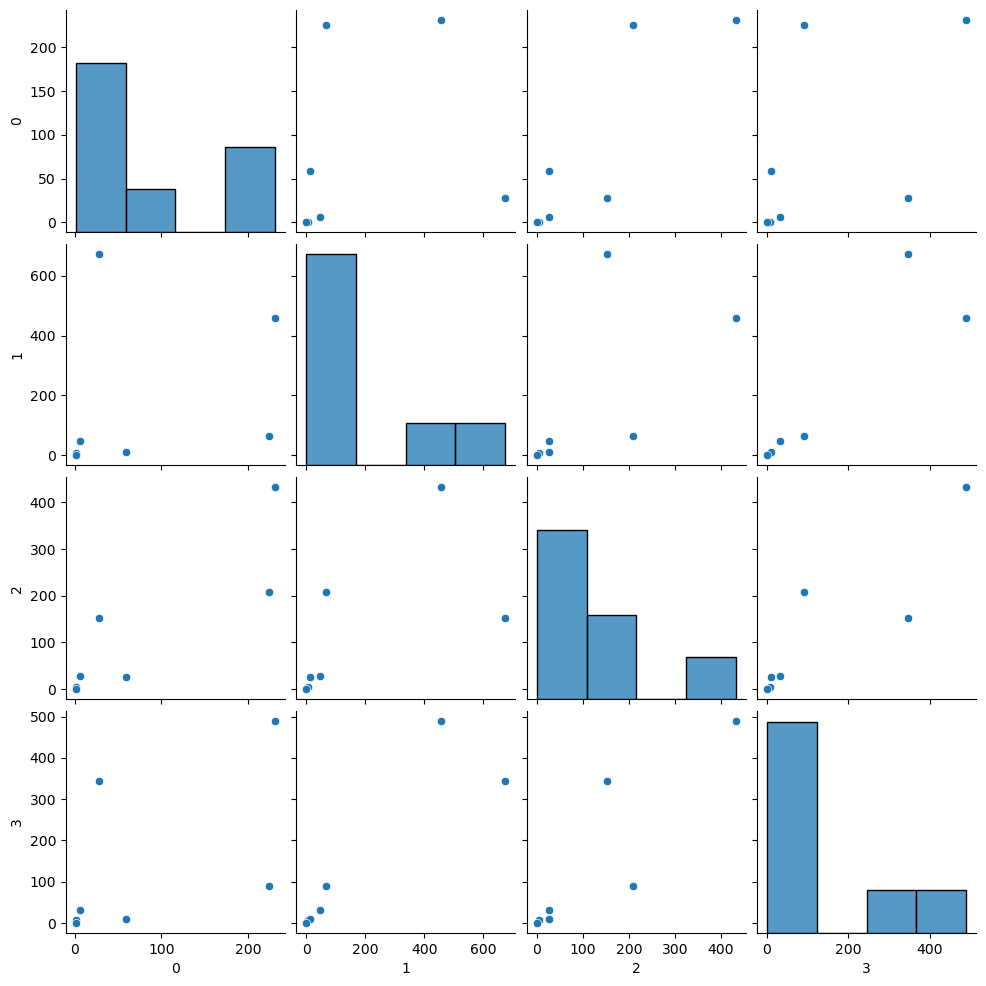

In [34]:
sns.pairplot(cluster2)
plt.show()

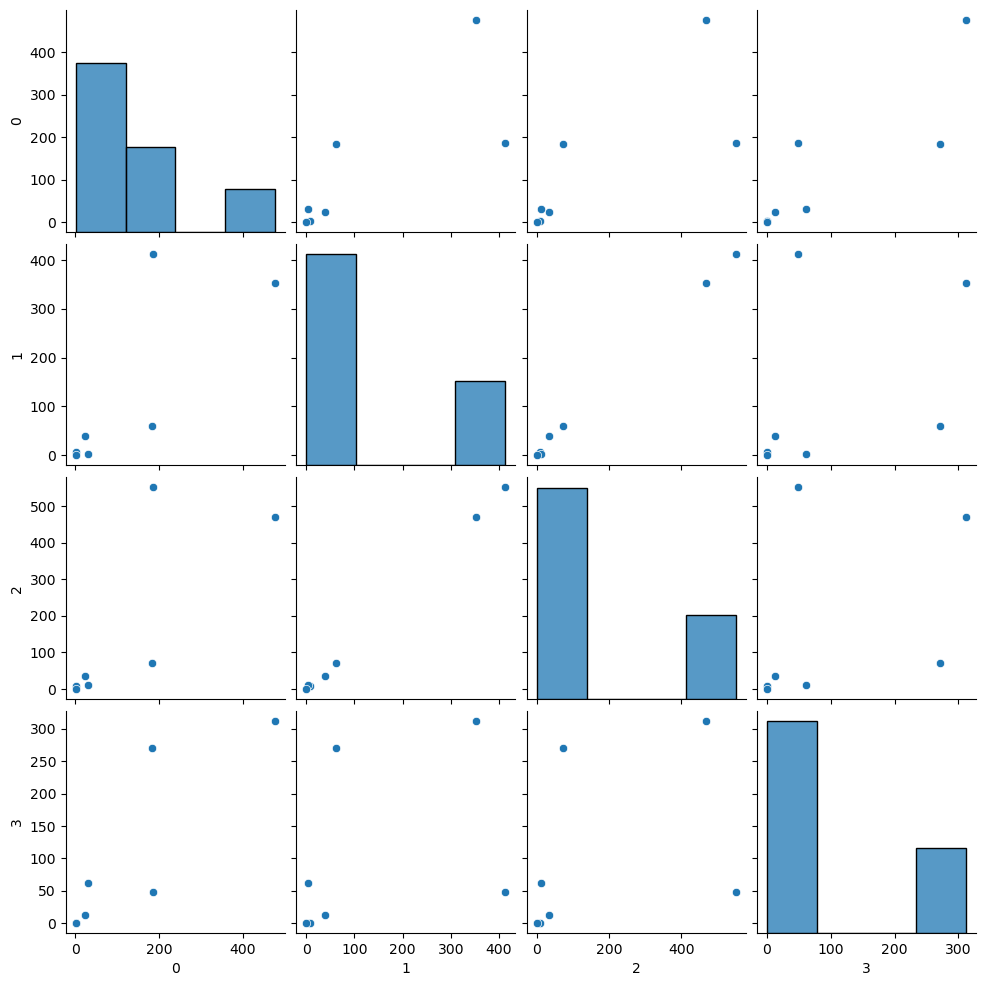

In [35]:
sns.pairplot(cluster3)
plt.show()

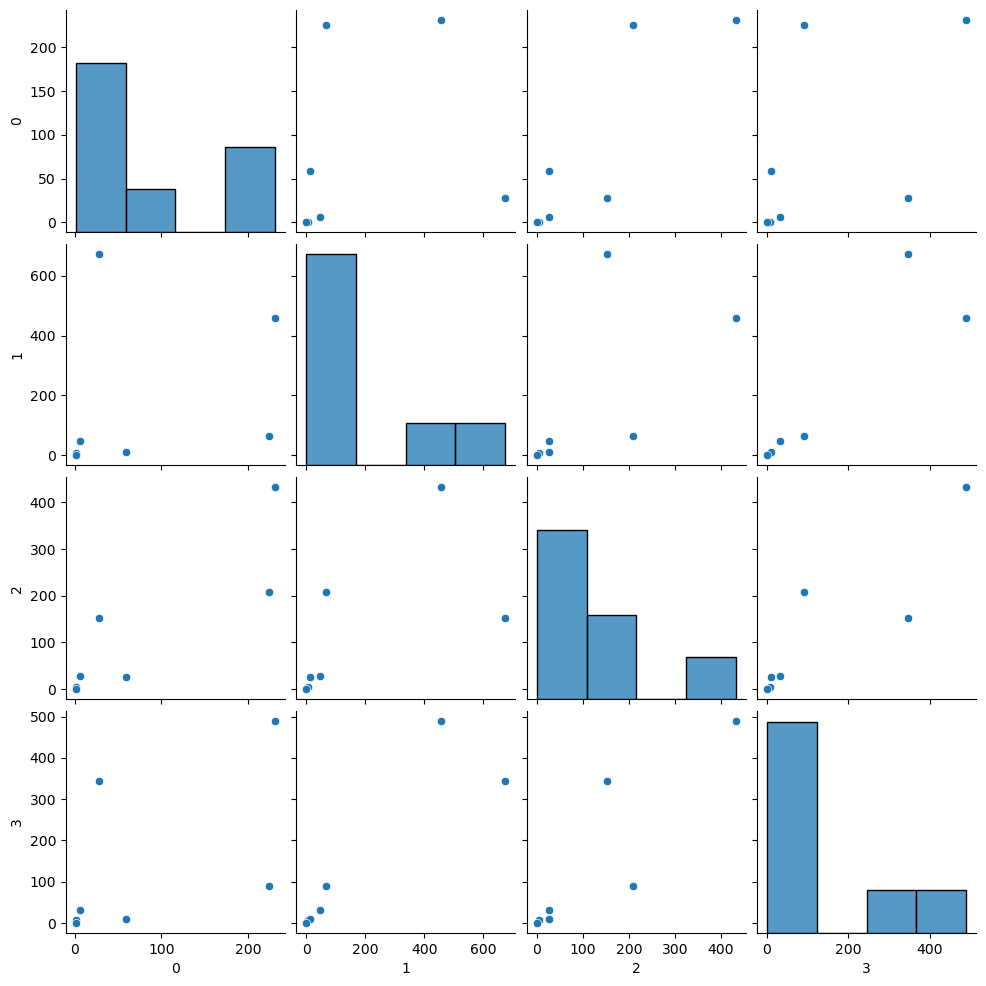

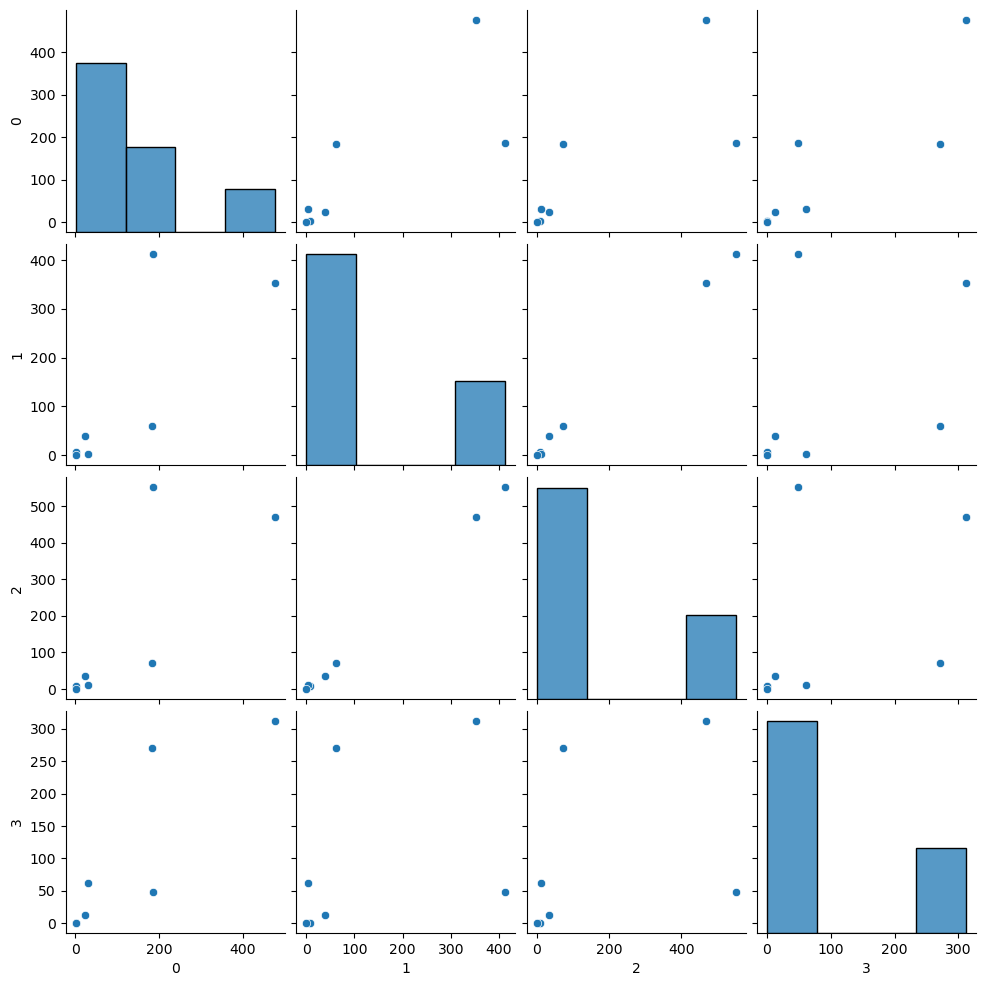

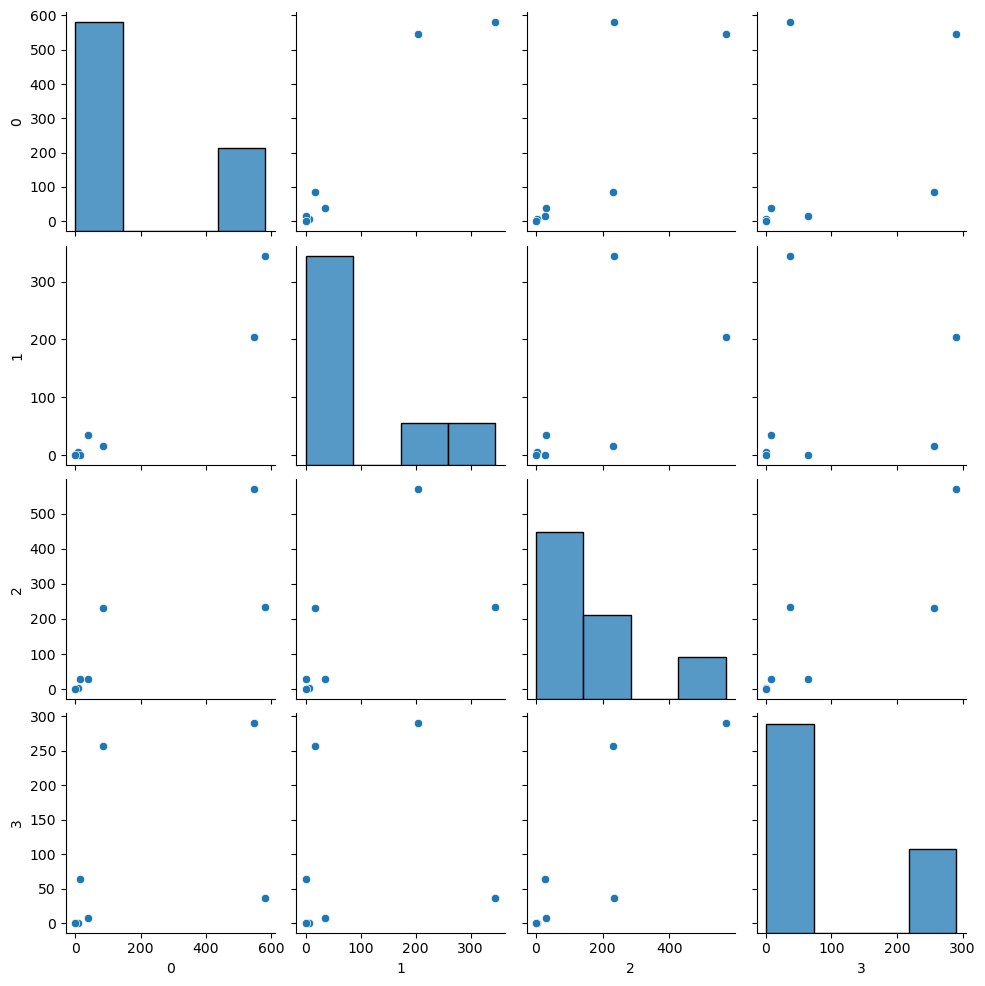

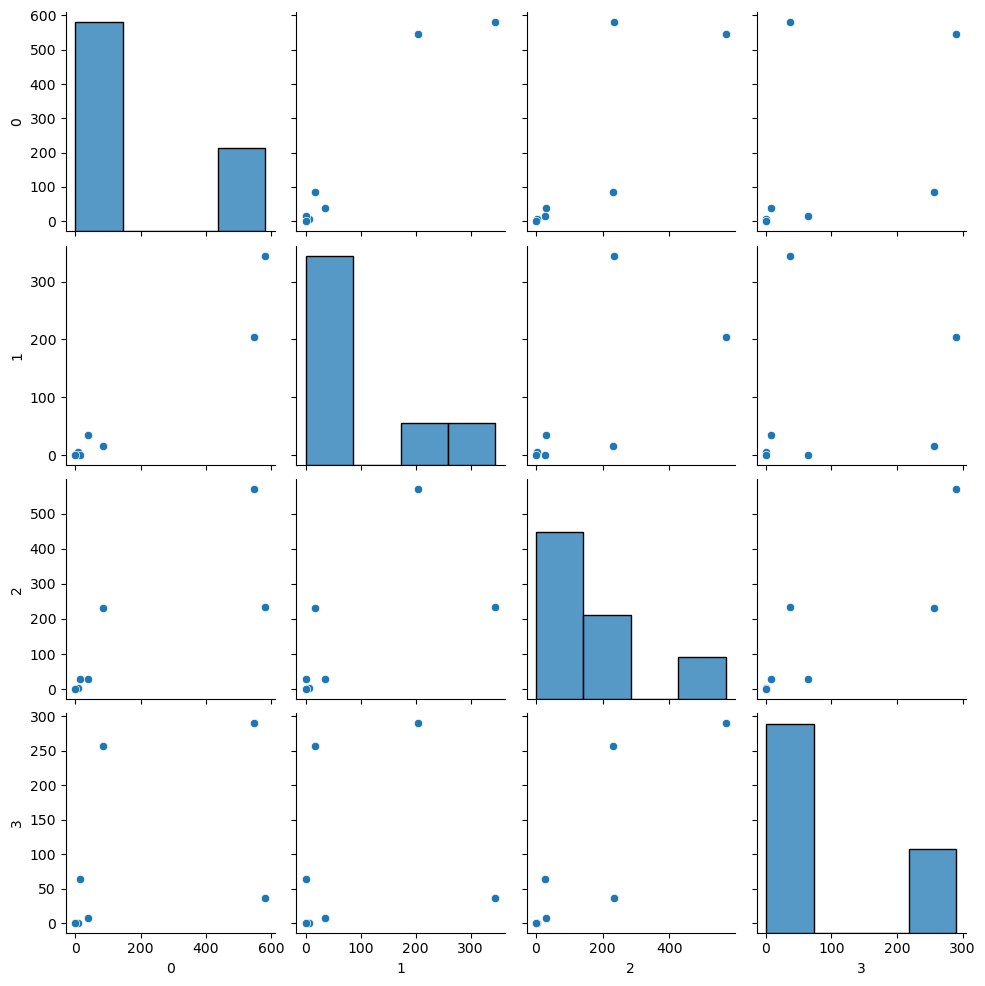

In [33]:
sns.pairplot(cluster4)
plt.show()